In [1]:
import torch
import seaborn as sns
from pyro.distributions import transforms as T
import pyro.distributions as dist
from torch import nn
import matplotlib.pyplot as plt
import numpy as np
import math

In [2]:
dataset = torch.cat([torch.randn(64), torch.randn(8) + 6])[:, None]

dataset = np.load('../datasets/Combined_GWTC_m1m2chieffz.npz')
dataset = torch.from_numpy(dataset['m1']).float()
# dataset= dataset.log()
# dataset = dataset.mean(1, keepdim=True)
dataset = (dataset - dataset.mean()) / dataset.std()





<AxesSubplot:ylabel='Count'>

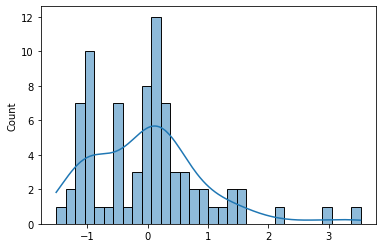

In [3]:
sns.histplot(dataset.mean(1), kde=True, bins=32)


<AxesSubplot:ylabel='Density'>

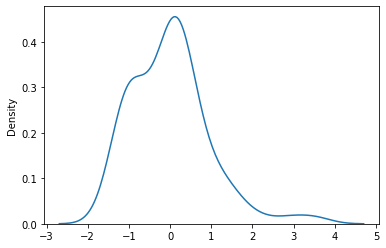

In [4]:
sns.kdeplot(dataset.mean(1).squeeze())

In [5]:
d = 1
n_layers = 6

step: 0, loss: 3.819040536880493


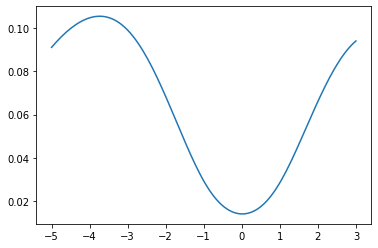

step: 8, loss: 3.609487771987915


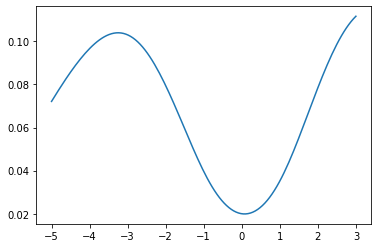

step: 16, loss: 3.0501723289489746


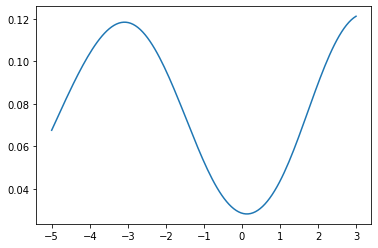

step: 24, loss: 3.1408305168151855


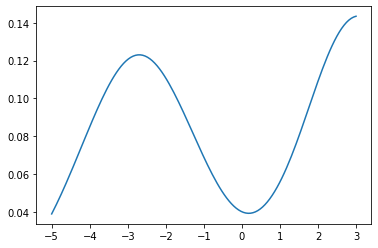

step: 32, loss: 2.569502353668213


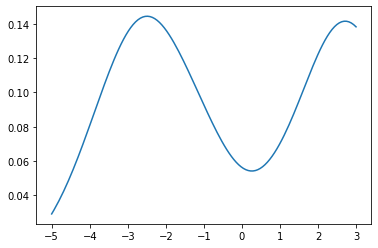

step: 40, loss: 2.389467239379883


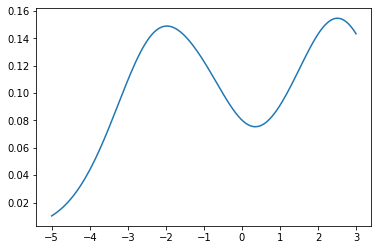

step: 48, loss: 1.961942195892334


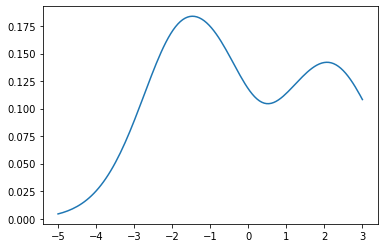

step: 56, loss: 1.5759928226470947


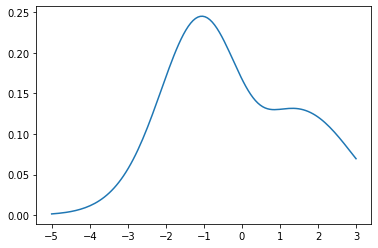

step: 64, loss: 1.7351605892181396


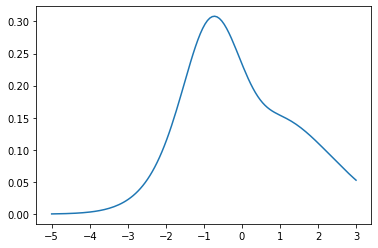

step: 72, loss: 1.2635858058929443


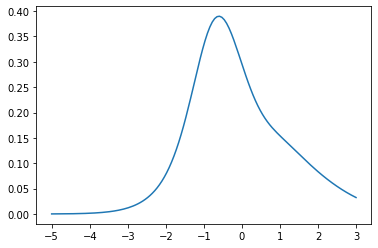

step: 80, loss: 1.0687005519866943


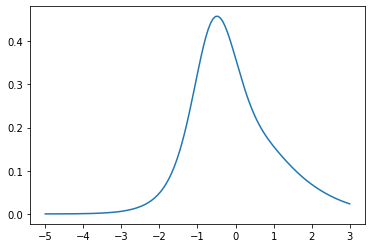

step: 88, loss: 1.0009891986846924


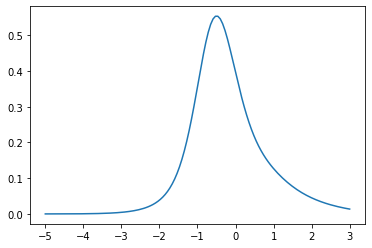

step: 96, loss: 1.4952958822250366


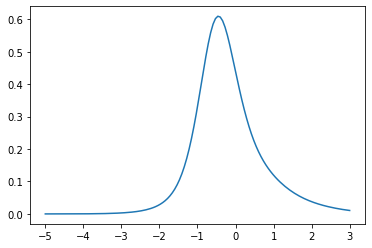

step: 104, loss: 1.4443168640136719


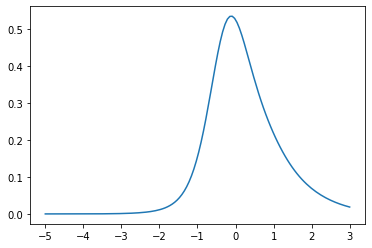

step: 112, loss: 1.067669153213501


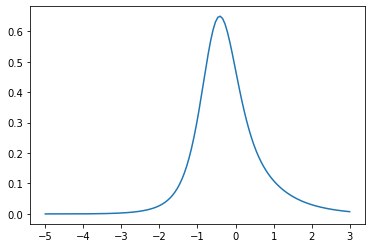

step: 120, loss: 0.7498736381530762


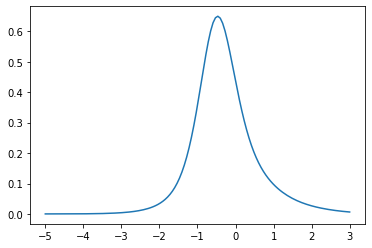

step: 128, loss: 1.6936652660369873


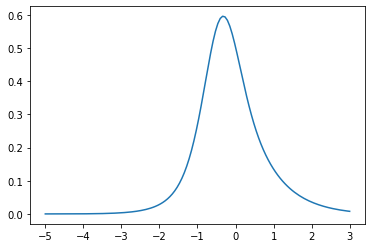

step: 136, loss: 1.1317245960235596


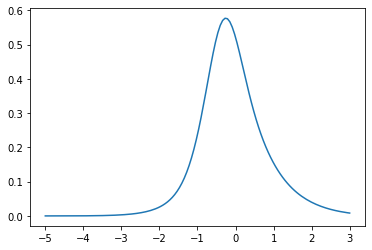

step: 144, loss: 0.8268394470214844


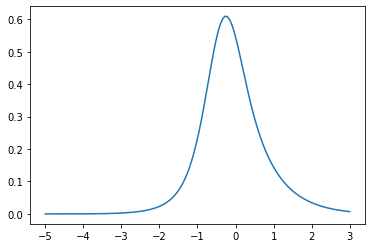

step: 152, loss: 0.8594539165496826


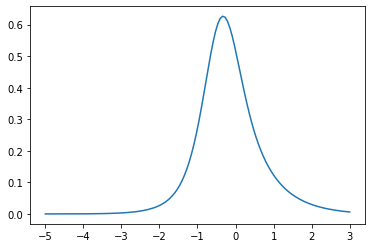

step: 160, loss: 1.00526762008667


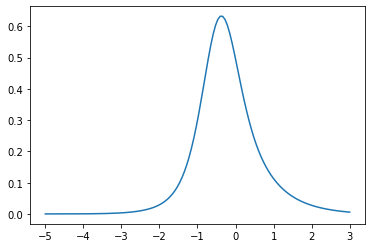

step: 168, loss: 1.0120351314544678


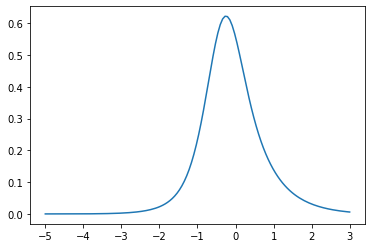

step: 176, loss: 1.299973487854004


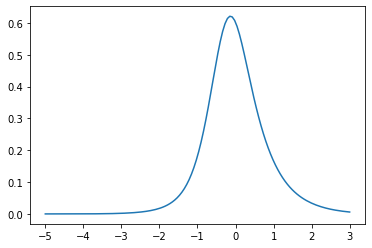

step: 184, loss: 1.3257384300231934


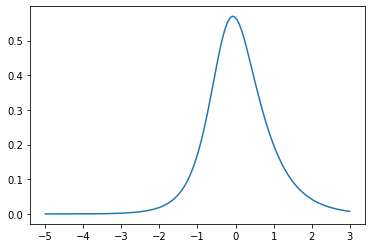

step: 192, loss: 1.4222843647003174


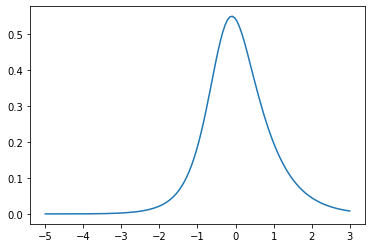

step: 200, loss: 1.277031421661377


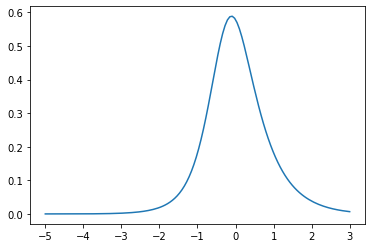

step: 208, loss: 1.282672643661499


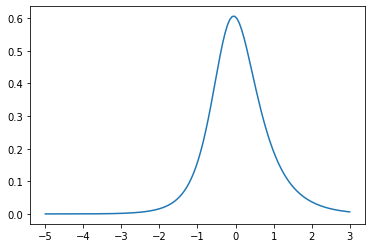

step: 216, loss: 1.069321870803833


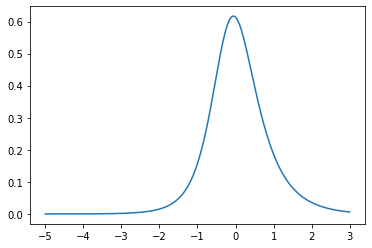

step: 224, loss: 1.7785768508911133


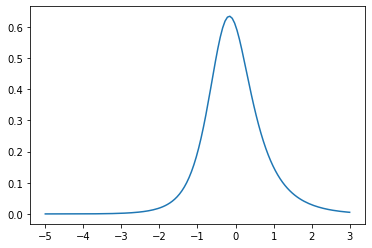

step: 232, loss: 0.9990248680114746


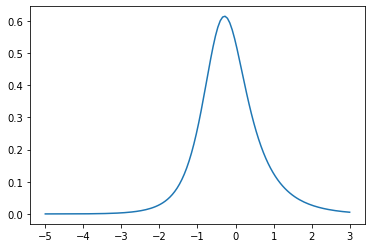

step: 240, loss: 1.0723812580108643


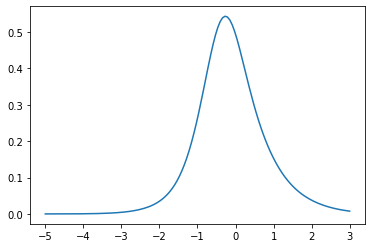

step: 248, loss: 0.9660694599151611


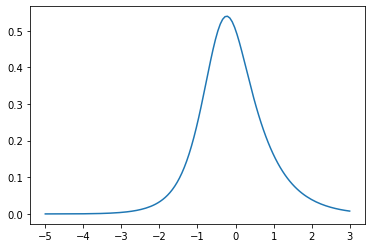

step: 256, loss: 0.9224700927734375


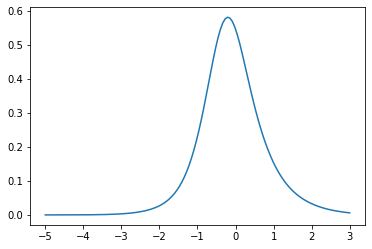

step: 264, loss: 0.9524931907653809


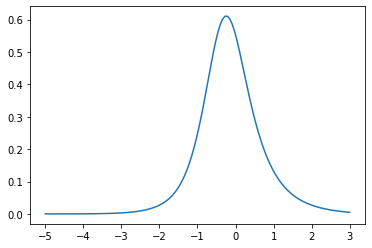

step: 272, loss: 1.2450041770935059


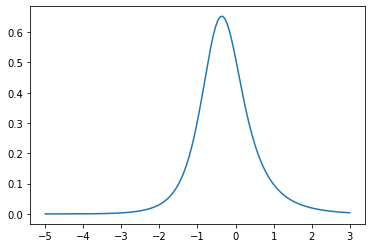

step: 280, loss: 2.6608810424804688


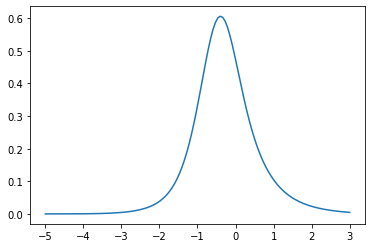

step: 288, loss: 1.2781422138214111


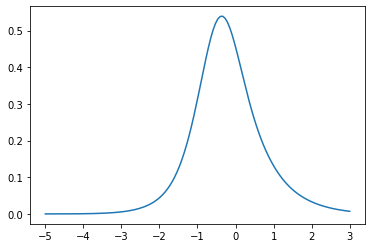

step: 296, loss: 1.0847499370574951


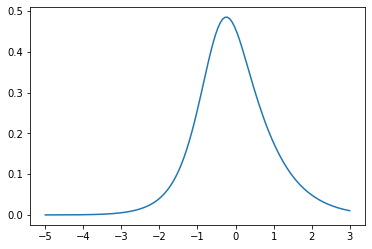

step: 304, loss: 1.465898036956787


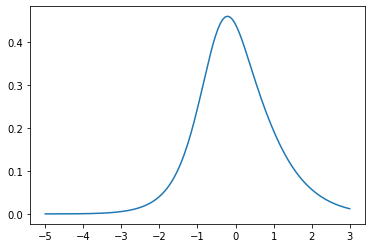

step: 312, loss: 1.4225304126739502


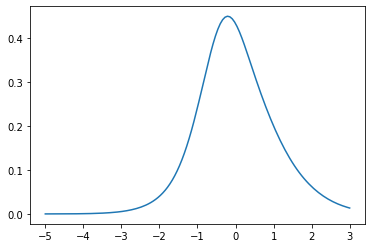

step: 320, loss: 1.38114333152771


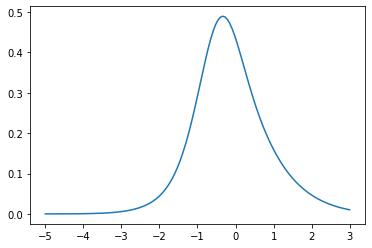

step: 328, loss: 1.7556111812591553


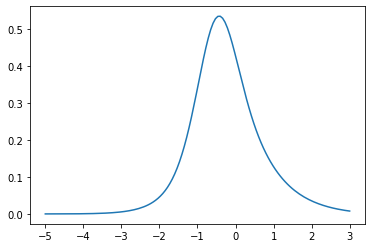

step: 336, loss: 1.2224907875061035


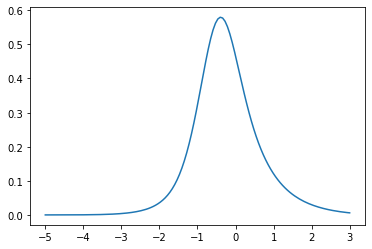

step: 344, loss: 0.9041764736175537


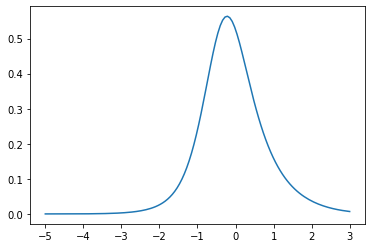

step: 352, loss: 1.3235808610916138


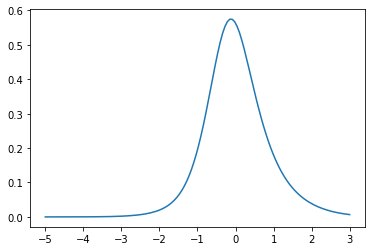

step: 360, loss: 0.9078691005706787


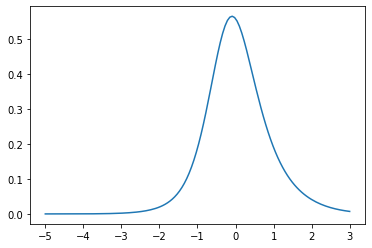

step: 368, loss: 1.9090981483459473


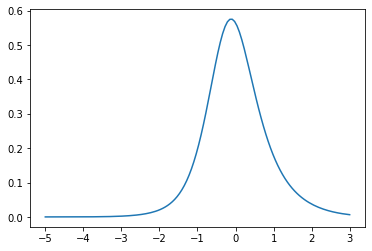

step: 376, loss: 1.352201223373413


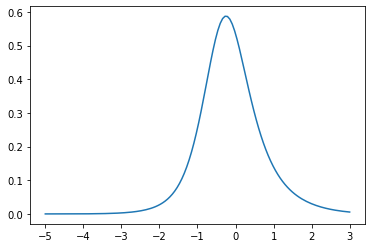

step: 384, loss: 1.4773621559143066


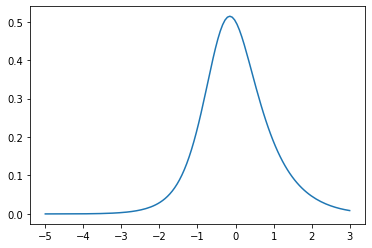

step: 392, loss: 0.9653754234313965


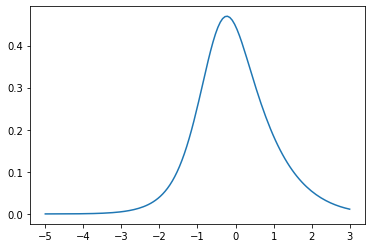

step: 400, loss: 1.2420172691345215


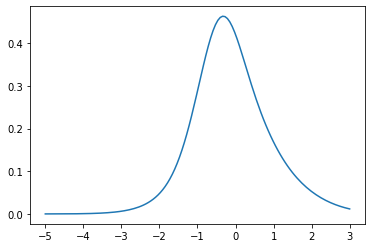

step: 408, loss: 1.4796814918518066


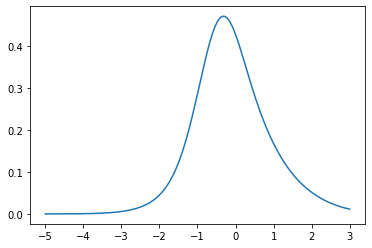

step: 416, loss: 1.2327396869659424


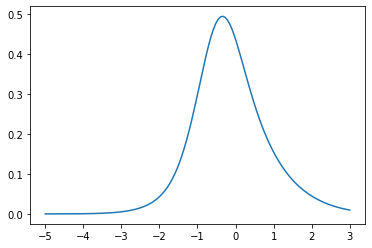

step: 424, loss: 1.1173944473266602


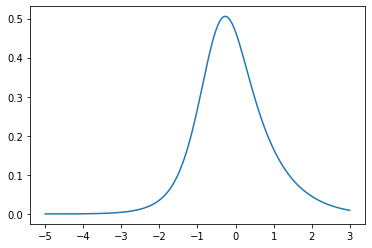

step: 432, loss: 0.9741289615631104


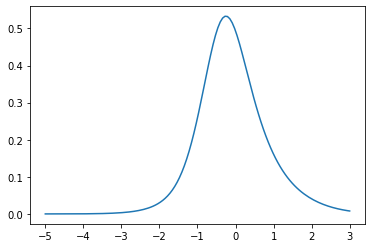

step: 440, loss: 1.1053581237792969


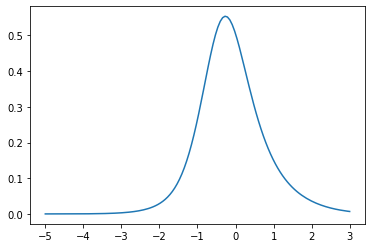

step: 448, loss: 1.0095372200012207


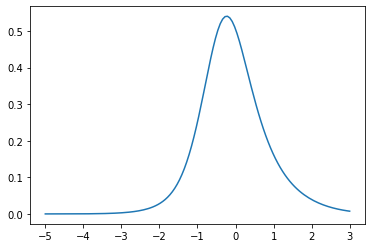

step: 456, loss: 1.485787272453308


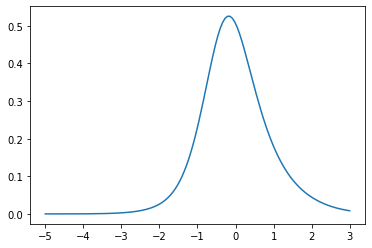

step: 464, loss: 1.4614040851593018


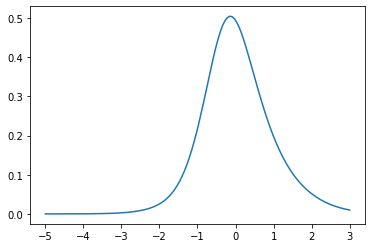

step: 472, loss: 1.4201805591583252


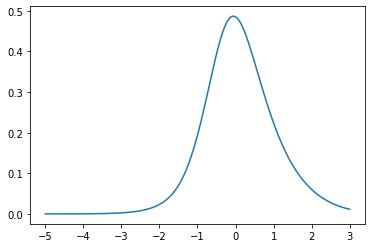

step: 480, loss: 1.496852159500122


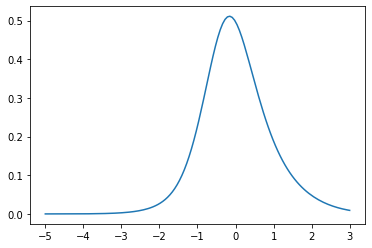

step: 488, loss: 0.8793423175811768


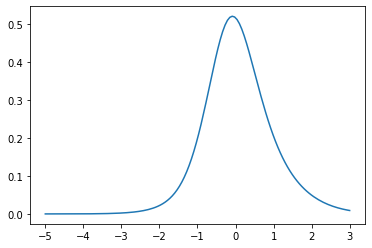

step: 496, loss: 0.8337173461914062


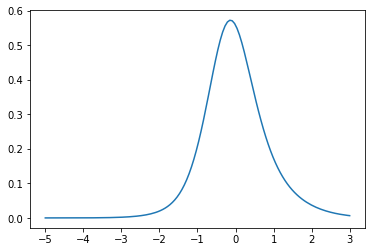

step: 504, loss: 1.839278221130371


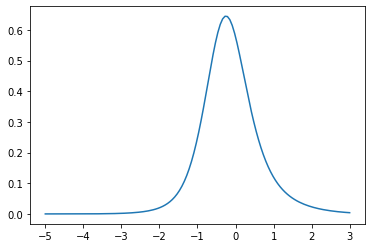

step: 512, loss: 1.5477542877197266


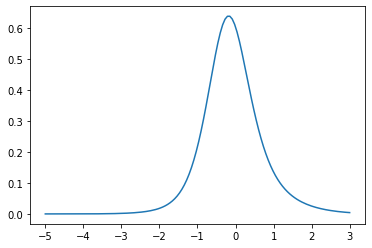

step: 520, loss: 1.0998389720916748


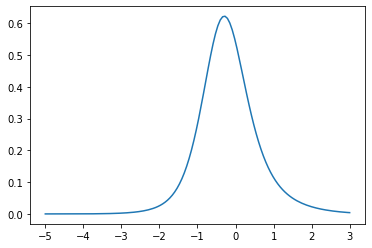

step: 528, loss: 1.0616483688354492


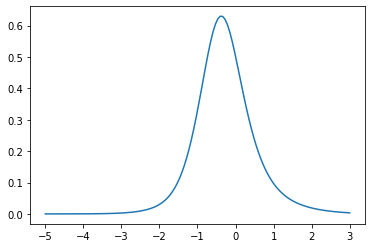

step: 536, loss: 0.9058239459991455


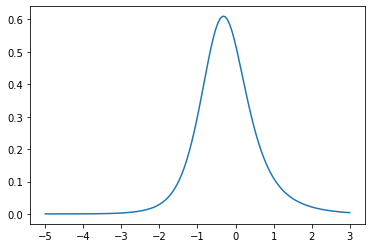

step: 544, loss: 1.494215965270996


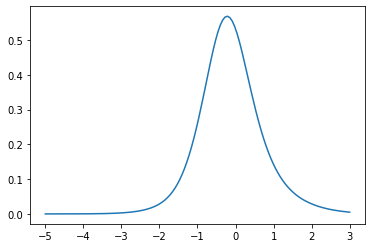

step: 552, loss: 1.2436256408691406


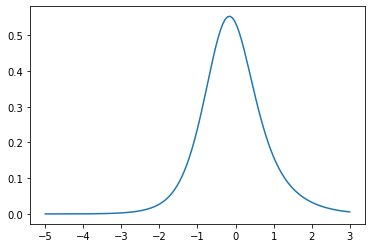

step: 560, loss: 1.2375383377075195


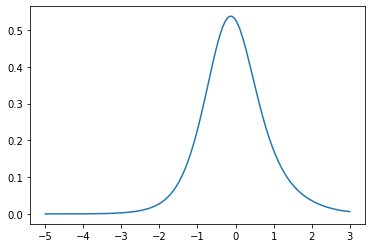

step: 568, loss: 0.9795966148376465


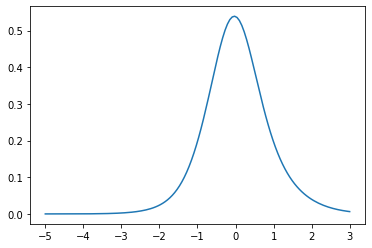

step: 576, loss: 0.9527297019958496


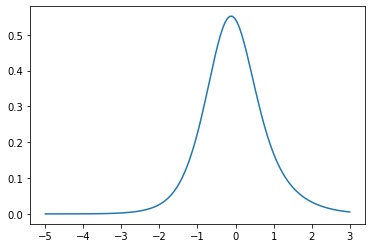

step: 584, loss: 1.1028270721435547


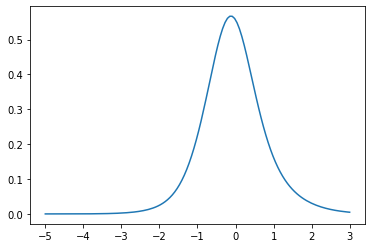

step: 592, loss: 1.3437275886535645


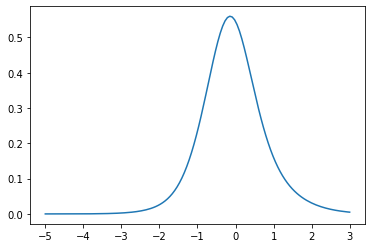

step: 600, loss: 0.898648738861084


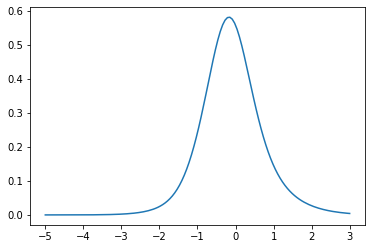

step: 608, loss: 1.4106711149215698


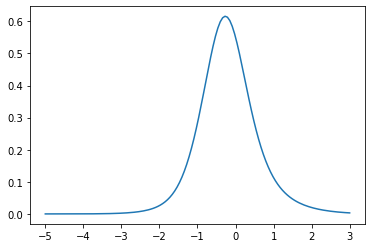

step: 616, loss: 0.9119396209716797


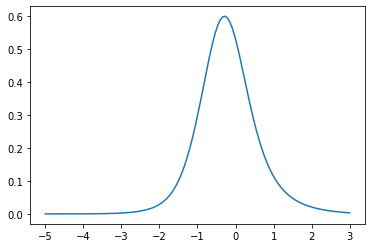

step: 624, loss: 1.7508623600006104


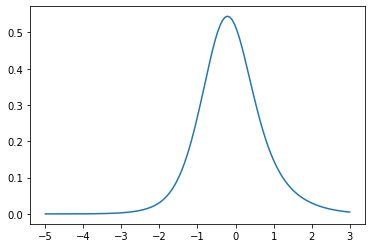

step: 632, loss: 1.4734623432159424


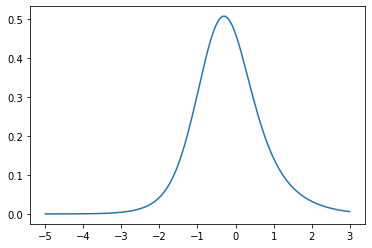

step: 640, loss: 1.0529301166534424


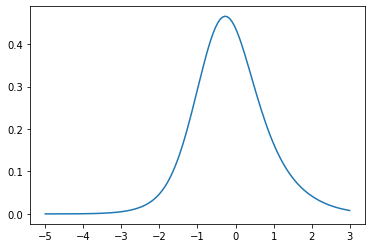

step: 648, loss: 1.4807575941085815


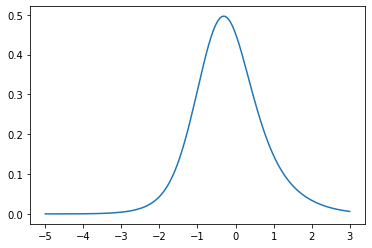

step: 656, loss: 1.6386185884475708


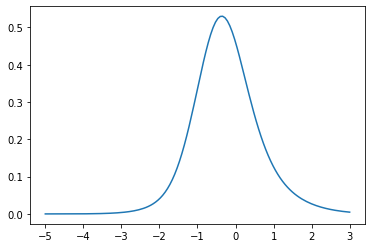

step: 664, loss: 1.2040290832519531


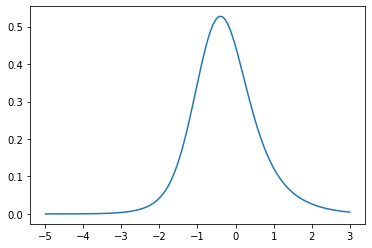

step: 672, loss: 1.3071377277374268


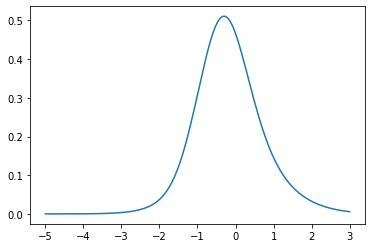

step: 680, loss: 1.0580804347991943


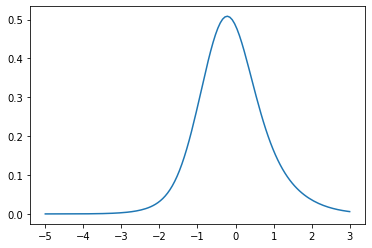

step: 688, loss: 1.1321032047271729


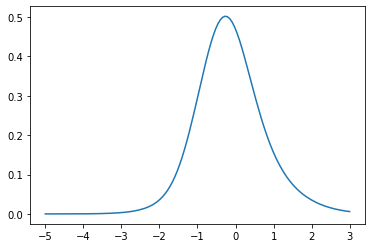

step: 696, loss: 1.035735845565796


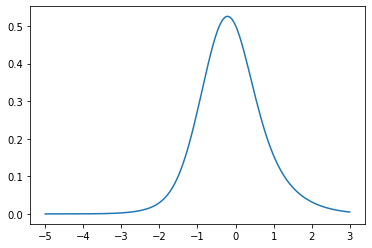

step: 704, loss: 2.030956745147705


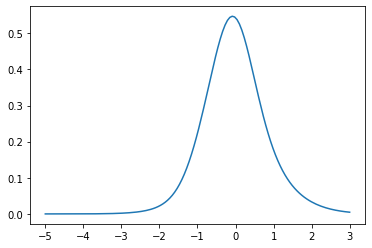

step: 712, loss: 1.1145379543304443


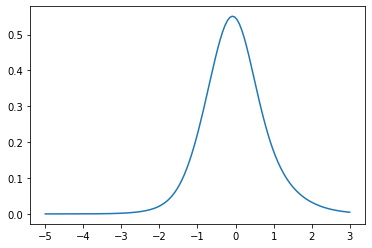

step: 720, loss: 0.8964953422546387


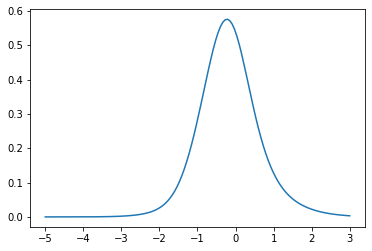

step: 728, loss: 1.1019816398620605


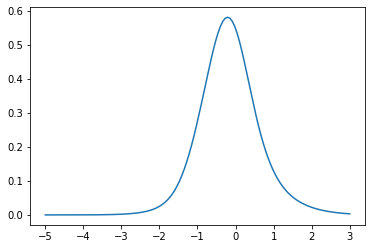

step: 736, loss: 1.2510650157928467


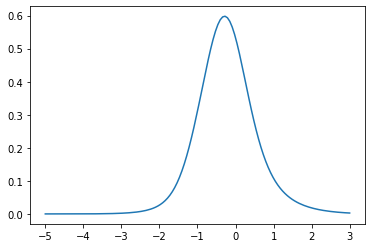

step: 744, loss: 1.4387867450714111


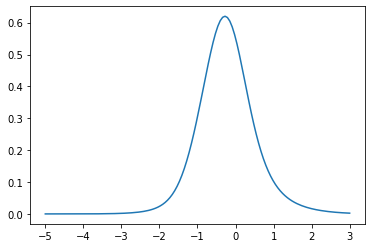

step: 752, loss: 1.0498425960540771


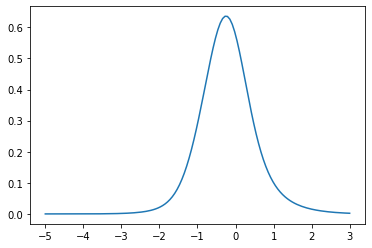

step: 760, loss: 0.8526630401611328


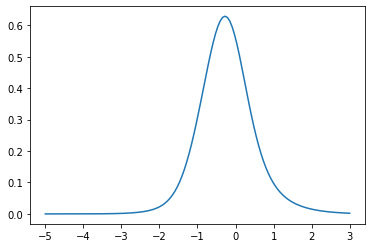

step: 768, loss: 0.9007089138031006


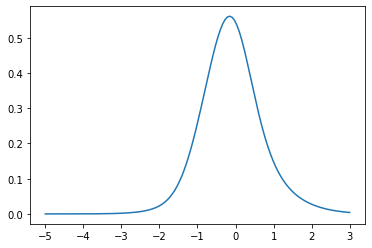

step: 776, loss: 1.3527565002441406


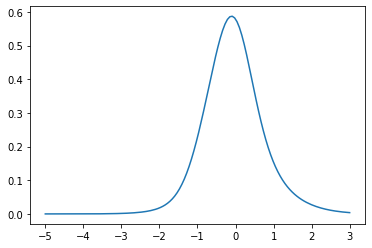

step: 784, loss: 1.2145392894744873


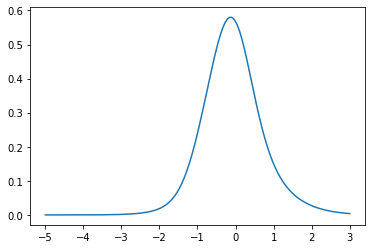

step: 792, loss: 0.9736416339874268


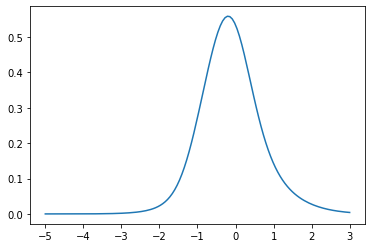

step: 800, loss: 1.3271560668945312


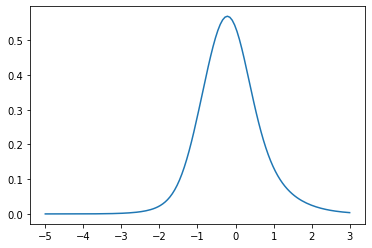

step: 808, loss: 2.022310256958008


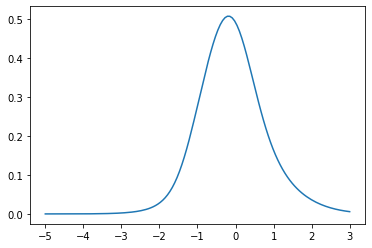

step: 816, loss: 0.9968609809875488


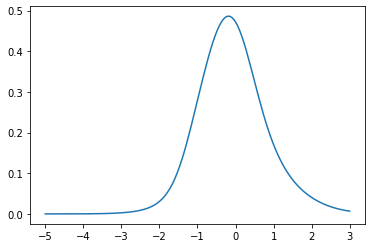

step: 824, loss: 1.096376895904541


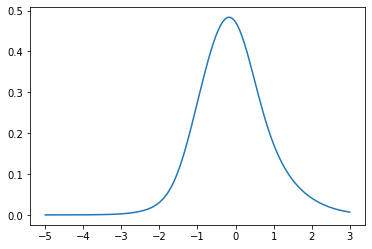

step: 832, loss: 0.9417726993560791


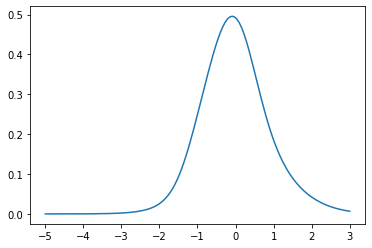

step: 840, loss: 0.9106485843658447


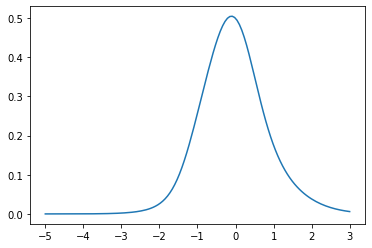

step: 848, loss: 1.1149036884307861


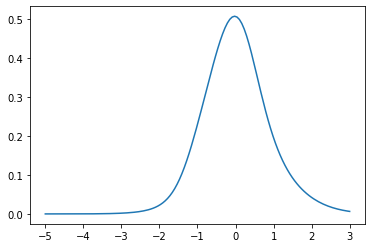

step: 856, loss: 1.201794147491455


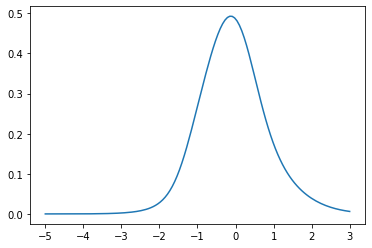

step: 864, loss: 1.2672247886657715


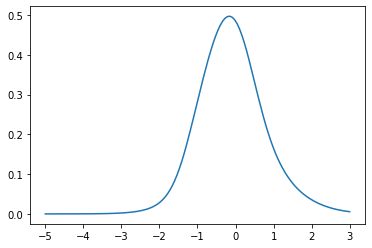

step: 872, loss: 0.9056439399719238


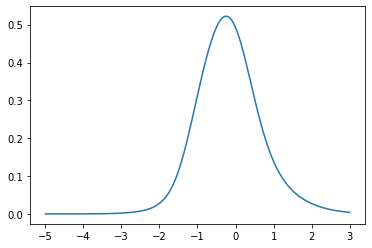

step: 880, loss: 0.7425422668457031


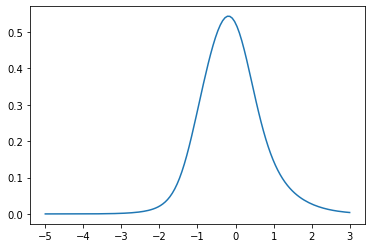

step: 888, loss: 1.2865612506866455


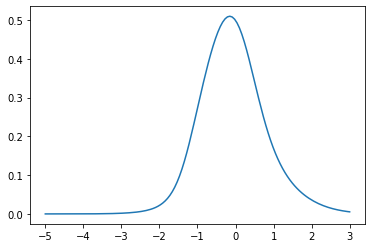

step: 896, loss: 2.952956199645996


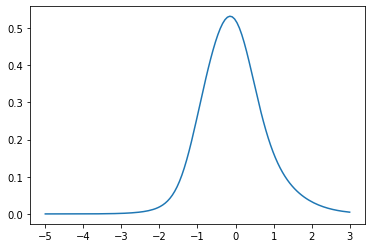

step: 904, loss: 1.1566314697265625


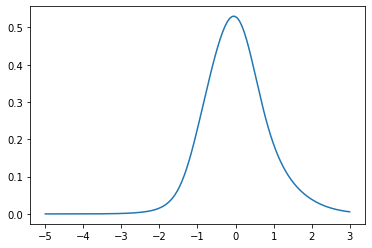

step: 912, loss: 1.258318305015564


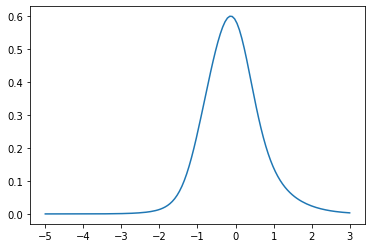

step: 920, loss: 0.6231026649475098


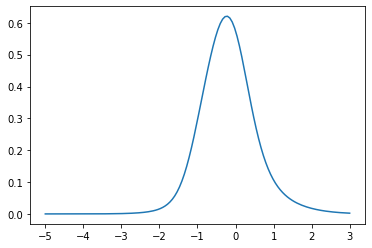

step: 928, loss: 1.4408695697784424


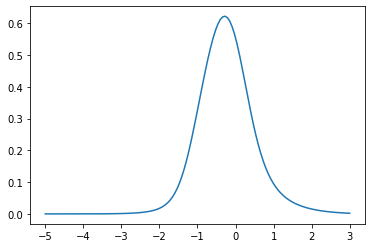

step: 936, loss: 2.4409937858581543


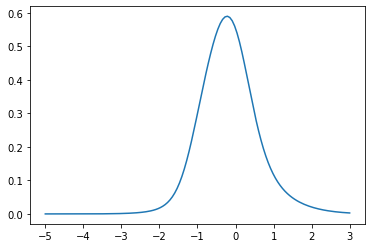

step: 944, loss: 1.829474925994873


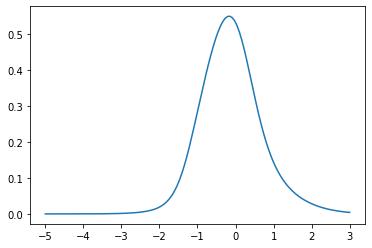

step: 952, loss: 1.122304916381836


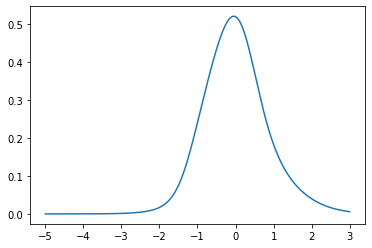

step: 960, loss: 0.9546816349029541


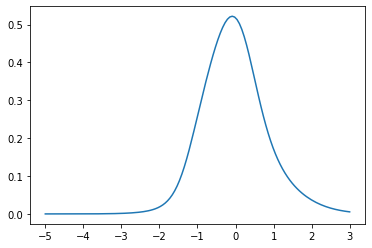

step: 968, loss: 1.0922904014587402


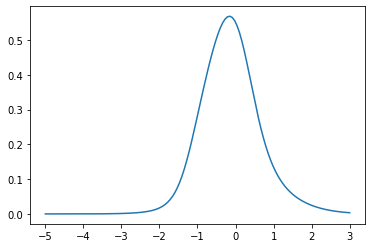

step: 976, loss: 0.8597617149353027


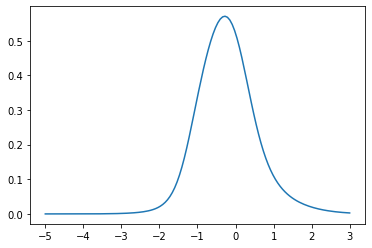

step: 984, loss: 1.087352991104126


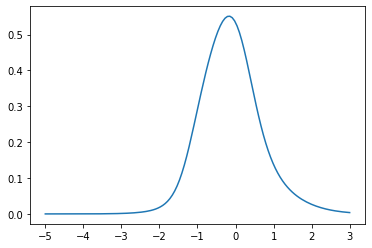

step: 992, loss: 0.9388079643249512


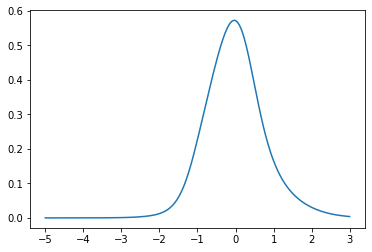

step: 1000, loss: 1.2733628749847412


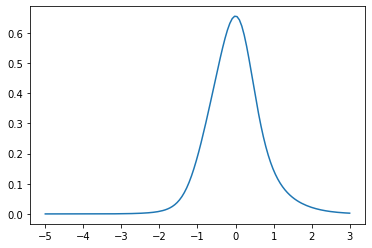

step: 1008, loss: 1.2806296348571777


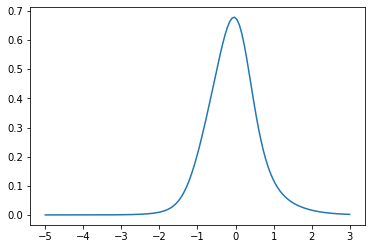

step: 1016, loss: 1.0310962200164795


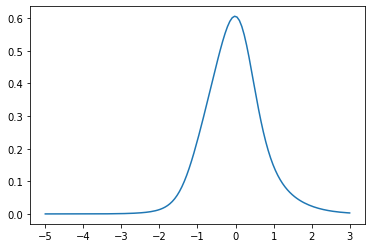

step: 1024, loss: 1.3253636360168457


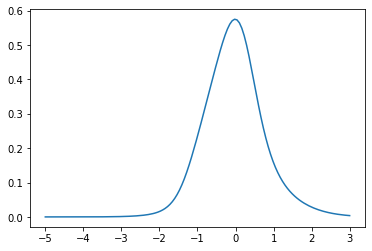

step: 1032, loss: 1.0086088180541992


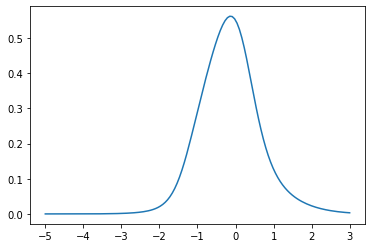

step: 1040, loss: 1.447796106338501


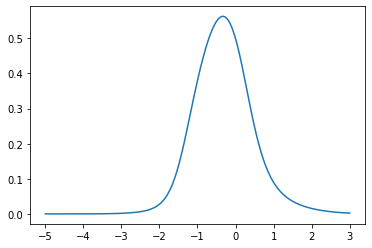

step: 1048, loss: 0.9727017879486084


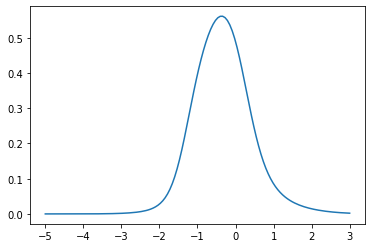

step: 1056, loss: 1.1058170795440674


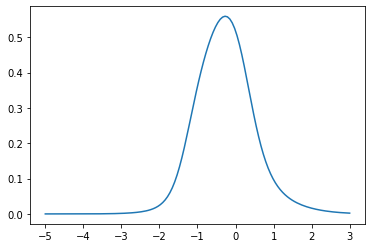

step: 1064, loss: 1.0993354320526123


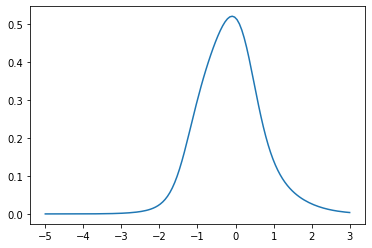

step: 1072, loss: 0.7826321125030518


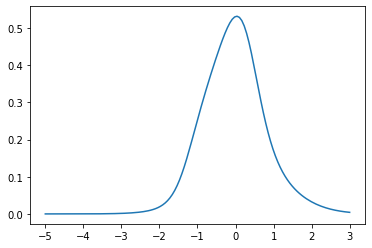

step: 1080, loss: 1.2980139255523682


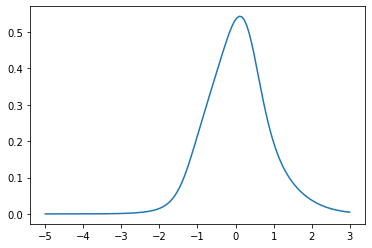

step: 1088, loss: 2.0122950077056885


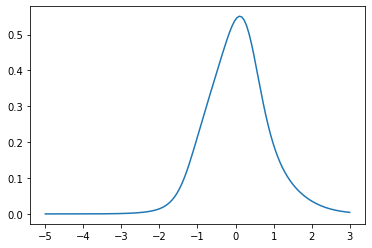

step: 1096, loss: 1.3088078498840332


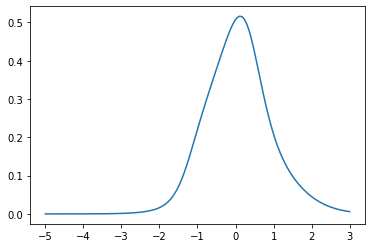

step: 1104, loss: 2.3272416591644287


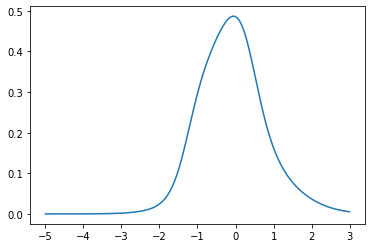

step: 1112, loss: 1.129906415939331


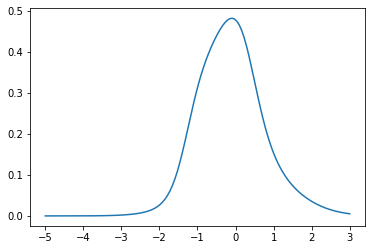

step: 1120, loss: 1.3665757179260254


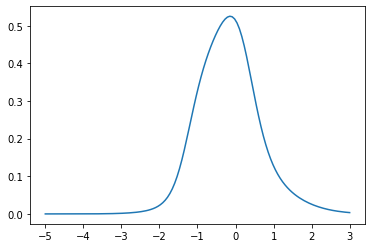

step: 1128, loss: 0.9618048667907715


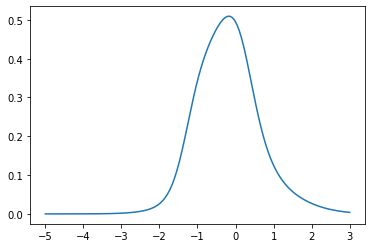

step: 1136, loss: 1.1627061367034912


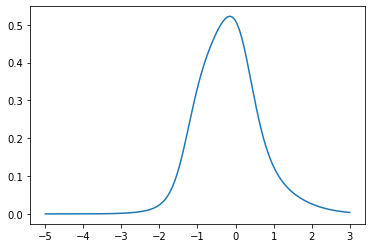

step: 1144, loss: 0.8604738712310791


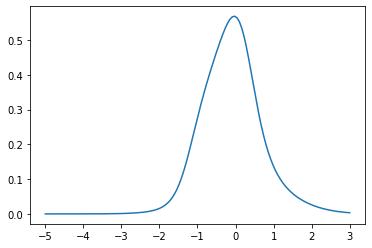

step: 1152, loss: 0.9618353843688965


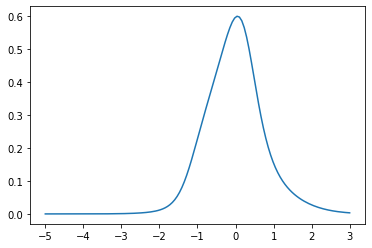

step: 1160, loss: 0.8244061470031738


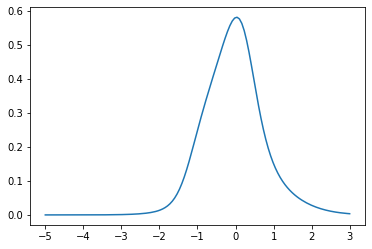

step: 1168, loss: 0.9137833118438721


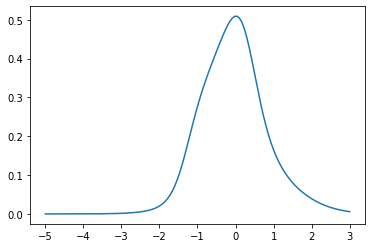

step: 1176, loss: 1.2527854442596436


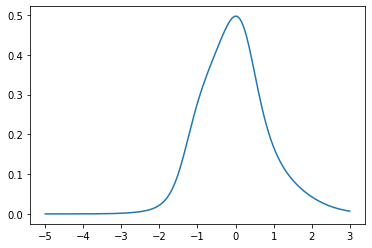

step: 1184, loss: 0.9129836559295654


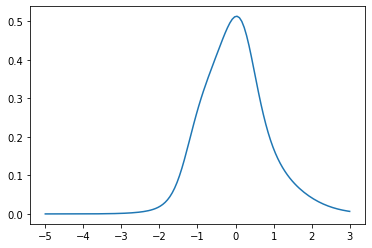

step: 1192, loss: 1.484034538269043


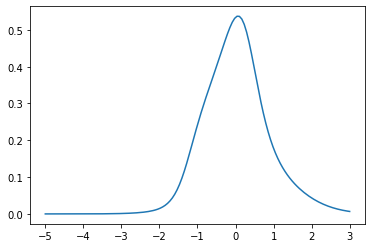

step: 1200, loss: 1.1461026668548584


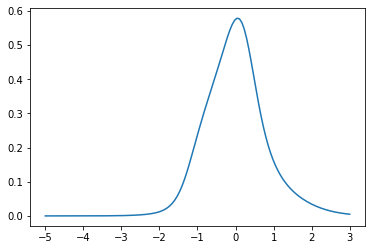

step: 1208, loss: 1.2303550243377686


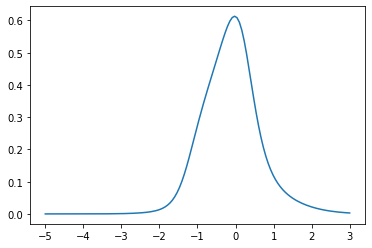

step: 1216, loss: 1.7567555904388428


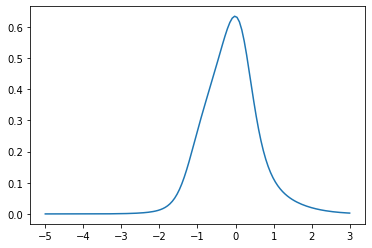

step: 1224, loss: 0.8968486785888672


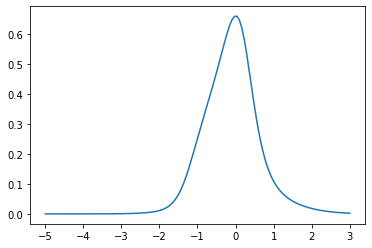

step: 1232, loss: 2.285108804702759


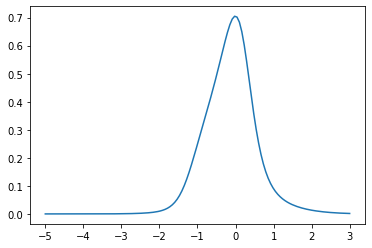

step: 1240, loss: 2.5035691261291504


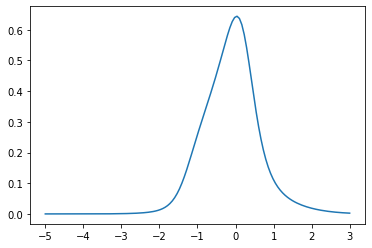

step: 1248, loss: 2.1244454383850098


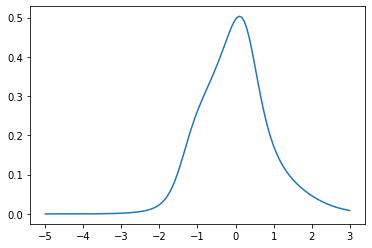

step: 1256, loss: 1.5589544773101807


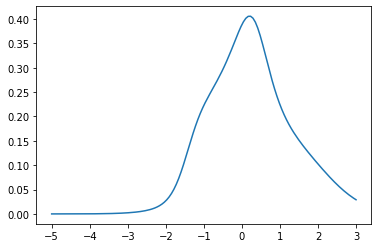

step: 1264, loss: 1.3005318641662598


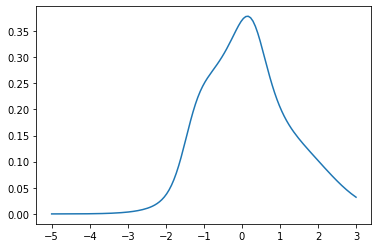

step: 1272, loss: 1.170788288116455


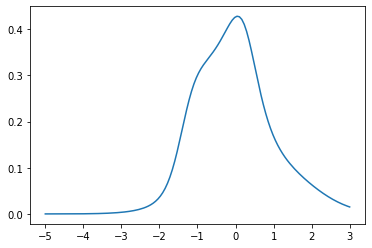

step: 1280, loss: 1.0553593635559082


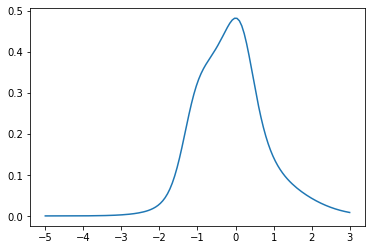

step: 1288, loss: 1.575563669204712


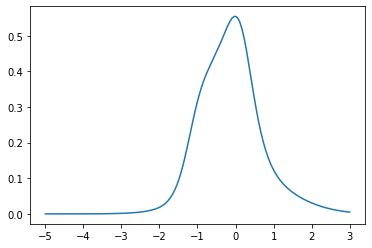

step: 1296, loss: 0.8611593246459961


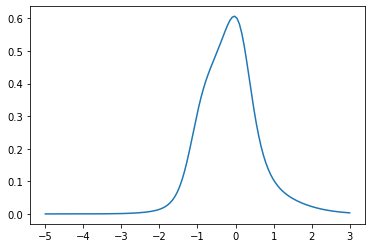

step: 1304, loss: 1.235123634338379


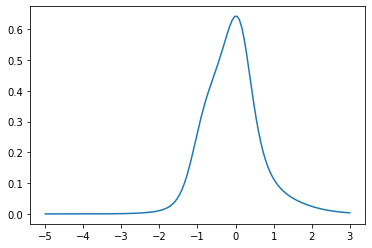

step: 1312, loss: 1.0787785053253174


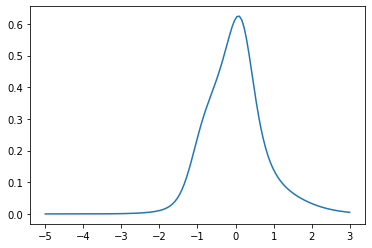

step: 1320, loss: 1.534128189086914


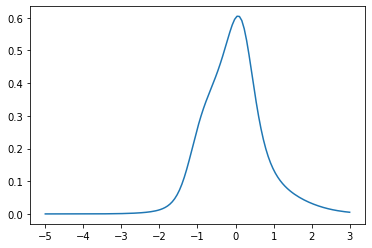

step: 1328, loss: 1.530121922492981


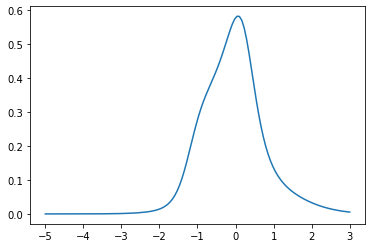

step: 1336, loss: 0.9800925254821777


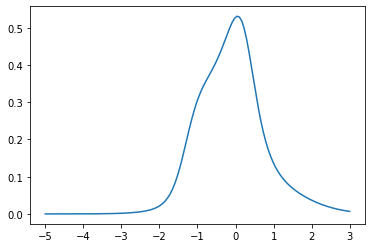

step: 1344, loss: 1.0726821422576904


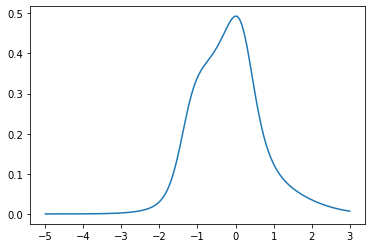

step: 1352, loss: 1.6975369453430176


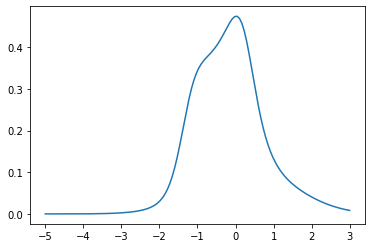

step: 1360, loss: 1.4454798698425293


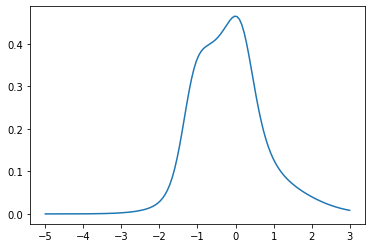

step: 1368, loss: 1.0302934646606445


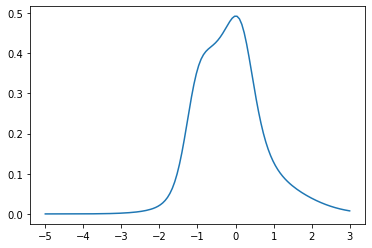

step: 1376, loss: 1.6690696477890015


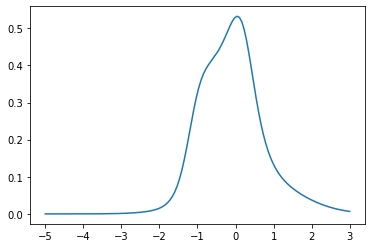

step: 1384, loss: 0.8762729167938232


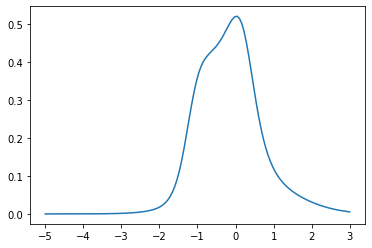

step: 1392, loss: 0.9552497863769531


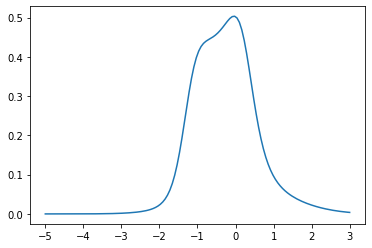

step: 1400, loss: 1.482378363609314


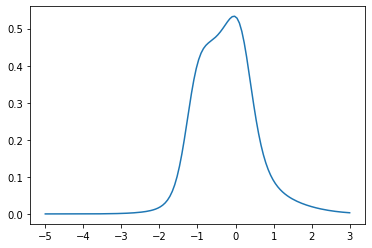

step: 1408, loss: 1.4402356147766113


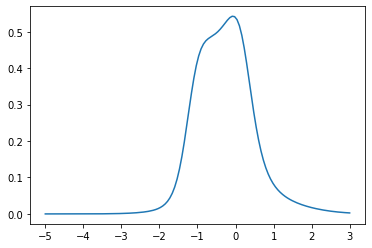

step: 1416, loss: 1.8301281929016113


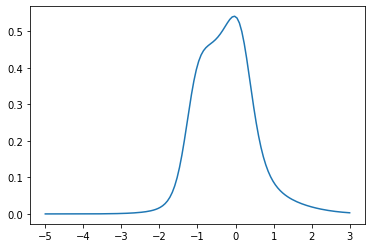

step: 1424, loss: 1.409633994102478


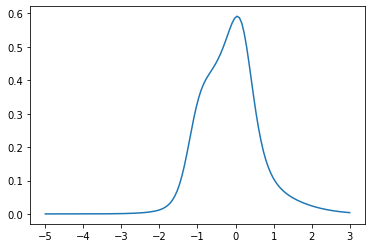

step: 1432, loss: 1.1988544464111328


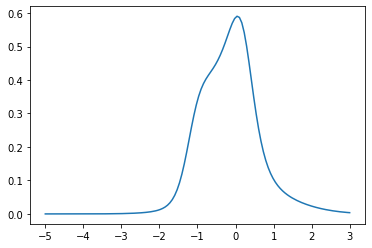

step: 1440, loss: 0.892540454864502


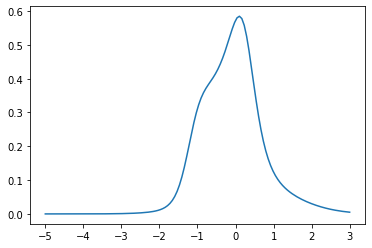

step: 1448, loss: 0.6938109397888184


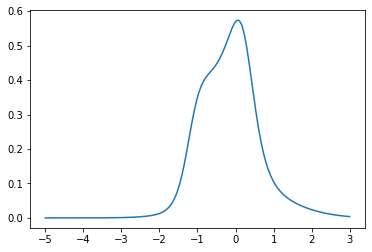

step: 1456, loss: 1.357185959815979


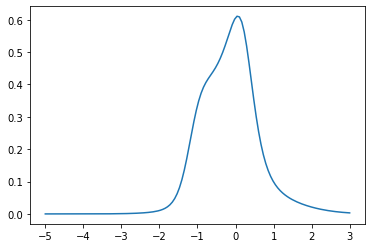

step: 1464, loss: 1.3900811672210693


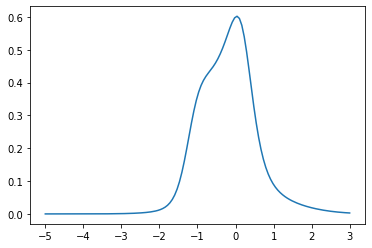

step: 1472, loss: 0.8193404674530029


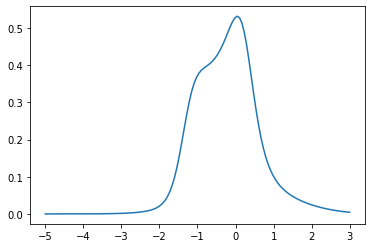

step: 1480, loss: 1.1995081901550293


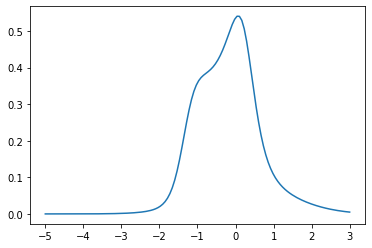

step: 1488, loss: 1.2887325286865234


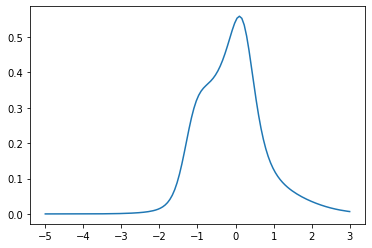

step: 1496, loss: 1.2644047737121582


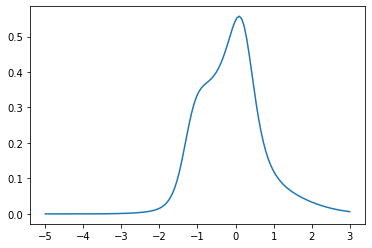

step: 1504, loss: 0.8254830837249756


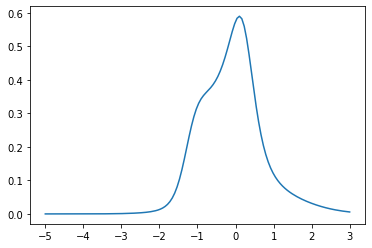

step: 1512, loss: 1.185591459274292


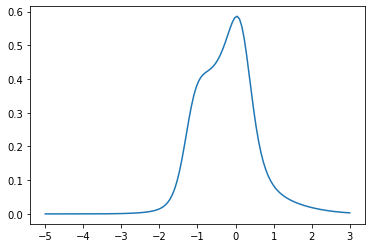

step: 1520, loss: 0.7995114326477051


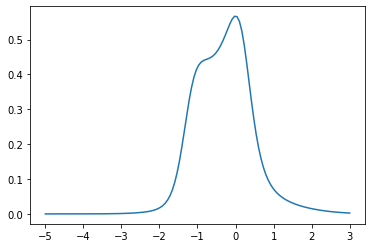

step: 1528, loss: 1.0387916564941406


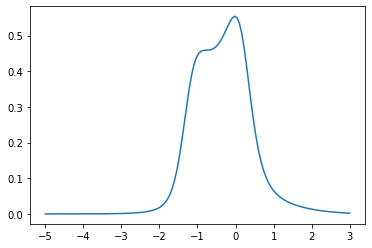

step: 1536, loss: 0.6854758262634277


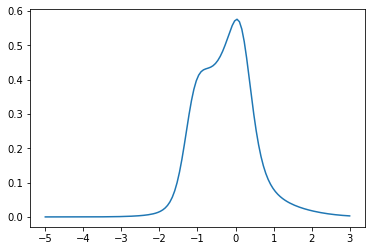

step: 1544, loss: 2.217053174972534


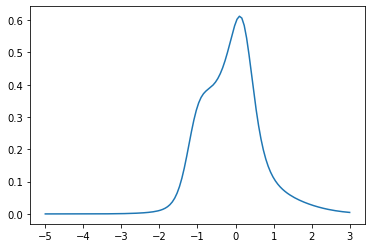

step: 1552, loss: 2.496954917907715


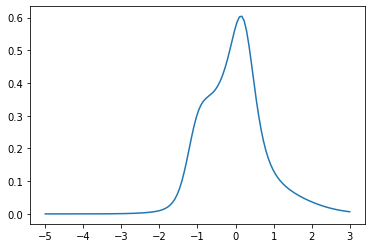

step: 1560, loss: 1.067612886428833


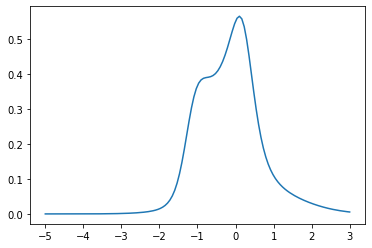

step: 1568, loss: 1.2587556838989258


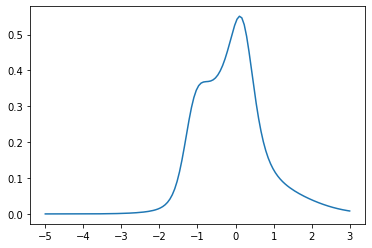

step: 1576, loss: 1.8642067909240723


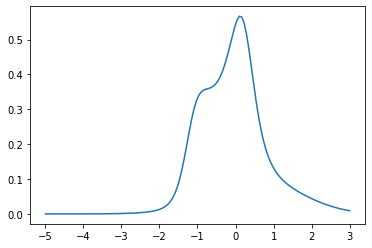

step: 1584, loss: 1.4611741304397583


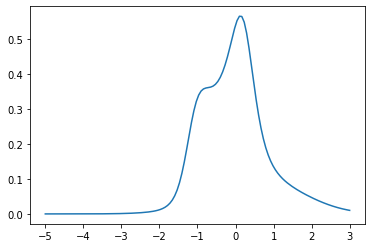

step: 1592, loss: 0.9250738620758057


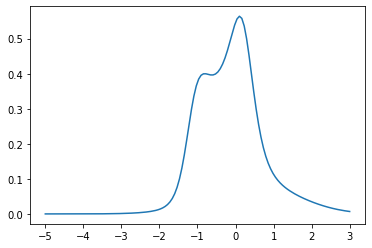

step: 1600, loss: 0.7977075576782227


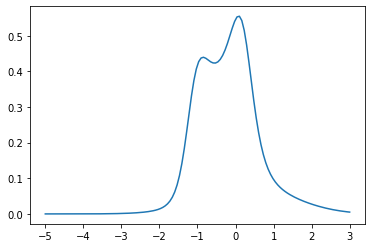

step: 1608, loss: 1.1941463947296143


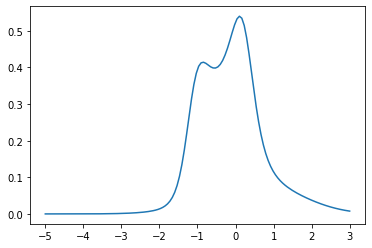

step: 1616, loss: 1.1810688972473145


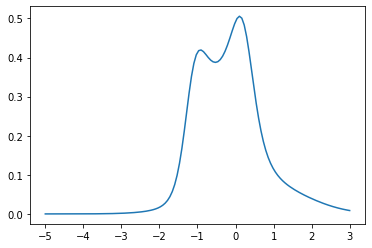

step: 1624, loss: 0.9274718761444092


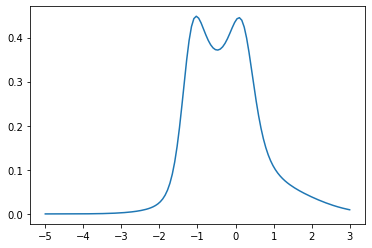

step: 1632, loss: 1.704355001449585


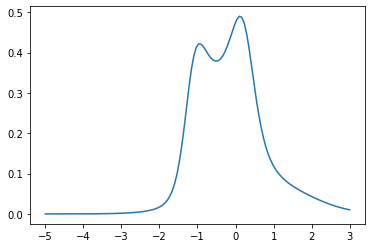

step: 1640, loss: 1.2352104187011719


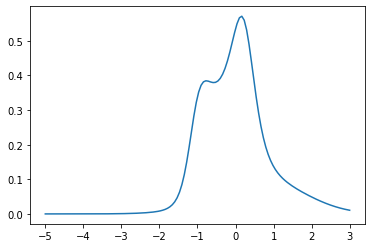

step: 1648, loss: 1.434133768081665


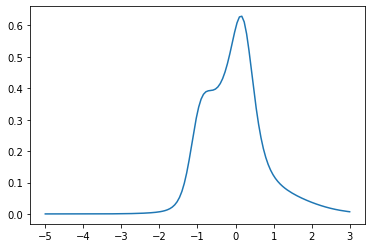

step: 1656, loss: 1.252637267112732


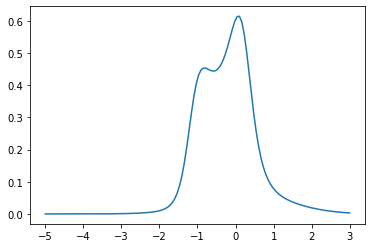

step: 1664, loss: 0.8748793601989746


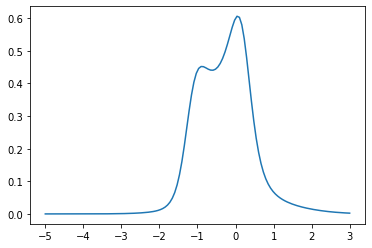

step: 1672, loss: 0.7227530479431152


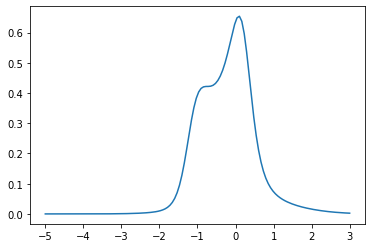

step: 1680, loss: 1.1505093574523926


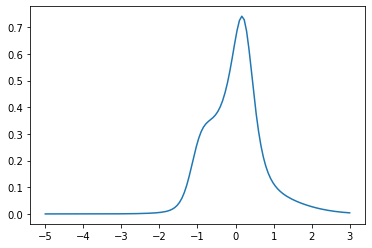

step: 1688, loss: 1.05108642578125


KeyboardInterrupt: 

In [6]:
transforms = nn.ModuleList([T.planar(d) for _ in range(n_layers)])
# transforms = nn.ModuleList([T.sylvester(d, count_transforms=2) for _ in range(n_layers)])
# transforms = nn.ModuleList([T.radial(d) for _ in range(n_layers)])
# transforms = nn.ModuleList([T.block_autoregressive(d) for _ in range(n_layers)])
# transforms = nn.ModuleList([T.neural_autoregressive(d) for _ in range(n_layers)])
# transforms = nn.ModuleList([T.affine_autoregressive(d) for _ in range(n_layers)])
# transforms = nn.ModuleList([T.affine_coupling(d) for _ in range(n_layers)])

base_dist = dist.Normal(0, 1)

def log_prob(x, transforms, base_dist):
    x= x.clone()
    J = 0
    for t in transforms:
        y = t(x)
        J += t.log_abs_det_jacobian(x, y)
        x = y
    log_prob = base_dist.log_prob(x).squeeze() + J
    return log_prob, y

batch_size = 4
steps = 8192
optimizer = torch.optim.Adam(transforms.parameters(), lr=1e-2)


for step in range(steps+1):
    optimizer.zero_grad()
    
    batch = dataset[torch.randperm(len(dataset))][:batch_size]
#     lp, y = log_prob(dataset, transforms, base_dist)
    lp, y = log_prob(batch.view(-1, 1), transforms, base_dist)
    lp = lp.view(batch.shape)
    
    lp = torch.logsumexp(lp, dim=-1) - math.log(lp.shape[-1])    
    loss = -lp.mean()
#     loss = -log_prob(flow_dist, dataset).mean()
    loss.backward()
    optimizer.step()
    
    
    
    if step % 8 == 0:
        print('step: {}, loss: {}'.format(step, loss.item()))
        with torch.no_grad():
            x = torch.linspace(-5, 3, 128)[:, None]
            lp, y = log_prob(x, transforms, base_dist)

            plt.plot(x.squeeze(), lp.exp().squeeze())
            plt.show()




In [ ]:
sum(p.numel() for p in transforms.parameters())

In [ ]:
# dataset_2d = torch.cat([torch.randn(64), torch.randn(8) + 6])
# dataset_2d = torch.stack([dataset_2d, dataset_2d + torch.randn_like(dataset_2d)], dim=-1)

dataset = np.load('../datasets/Combined_GWTC_m1m2chieffz.npz')
dataset_2d = torch.stack([torch.tensor(dataset['m1']), torch.tensor(dataset['m2'])], dim=-1).float()
dataset_2d = dataset_2d.mean(dim=1)

dataset_2d = (dataset_2d - dataset_2d.mean(dim=0, keepdim=True)) / dataset_2d.std(dim=0, keepdim=True)

sns.histplot(x=dataset_2d[:, 0], y=dataset_2d[:, 1], bins=32)
sns.kdeplot(x=dataset_2d[:, 0], y=dataset_2d[:, 1])




In [ ]:

d = 2
n_layers = 12

transforms = []
for _ in range(n_layers):
    transforms.append(T.planar(d))
    transforms.append(T.permute(d, permutation=torch.tensor([1, 0])))
transform_modules = nn.ModuleList([m for m in transforms if isinstance(m, nn.Module)])

base_dist = dist.Normal(0, 1)

def log_prob(x, transforms, base_dist):
    x= x.clone()
    J = 0
    for t in transforms:
#         print(x.shape)
        y = t(x)
        J += t.log_abs_det_jacobian(x, y)
        x = y
        
    log_prob = base_dist.log_prob(x).sum(-1) + J
    return log_prob, y

batch_size = 4
steps = 8192
optimizer = torch.optim.Adam(transform_modules.parameters(), lr=1e-2)
for step in range(steps+1):
    optimizer.zero_grad()
    
    batch = dataset_2d[torch.randperm(len(dataset_2d))][:batch_size]
#     print(dataset_2d.shape)
    lp, y = log_prob(dataset_2d, transforms, base_dist)
#     lp, y = log_prob(batch.view(-1, 1), transforms, base_dist)
#     lp = lp.view(batch.shape)
#     lp = torch.logsumexp(lp, dim=-1) - math.log(lp.shape[-1])    

    loss = -lp.mean()
#     loss = -log_prob(flow_dist, dataset_2d).mean()
    loss.backward()
    optimizer.step()
    
    
    
    if step % 8 == 0:
        print('step: {}, loss: {}'.format(step, loss.item()))
        with torch.no_grad():
            x = torch.linspace(-5, 5, 128)
            xx, yy = torch.meshgrid(x, x, indexing='xy')
            grid = torch.stack([xx, yy]).view(d, -1).permute(1, 0)
            lp, y = log_prob(grid, transforms, base_dist)
            p = lp.exp().view(128, 128)
            plt.imshow(p, extent=(-5, 5, -5, 5), origin='lower')
            plt.show()
            
            plt.plot(p.sum(0))
            plt.show()
            plt.plot(p.sum(1))
            plt.show()



In [ ]:
# dataset_2d = torch.cat([torch.randn(64), torch.randn(8) + 6])
# dataset_2d = torch.stack([dataset_2d, dataset_2d + torch.randn_like(dataset_2d)], dim=-1)

dataset = np.load('../datasets/Combined_GWTC_m1m2chieffz.npz')
dataset_2d = torch.stack([torch.tensor(dataset['m1']), torch.tensor(dataset['m2'])], dim=-1).float()

dataset_2d = (dataset_2d - dataset_2d.mean(dim=(0, 1), keepdim=True)) / dataset_2d.std(dim=(0, 1), keepdim=True)

sns.histplot(x=dataset_2d.mean(1)[:, 0], y=dataset_2d.mean(1)[:, 1], bins=32)
sns.kdeplot(x=dataset_2d.mean(1)[:, 0], y=dataset_2d.mean(1)[:, 1])





In [ ]:

d = 2
n_layers = 8

transforms = []
for _ in range(n_layers):
    transforms.append(T.planar(d))
    transforms.append(T.permute(d, permutation=torch.tensor([1, 0])))
transform_modules = nn.ModuleList([m for m in transforms if isinstance(m, nn.Module)])

base_dist = dist.Normal(0, 1)

def log_prob(x, transforms, base_dist):
    x= x.clone()
    J = 0
    for t in transforms:
#         print(x.shape)
        y = t(x)
        J += t.log_abs_det_jacobian(x, y)
        x = y
        
    log_prob = base_dist.log_prob(x).sum(-1) + J
    return log_prob, y

batch_size = 4
steps = 8192
optimizer = torch.optim.Adam(transform_modules.parameters(), lr=1e-2)
for step in range(steps+1):
    optimizer.zero_grad()
    
    batch = dataset_2d[torch.randperm(len(dataset_2d))][:batch_size]
#     print(dataset_2d.shape)
#     lp, y = log_prob(batch, transforms, base_dist)
    lp, y = log_prob(batch.view(-1, 2), transforms, base_dist)
    lp = lp.view(batch.shape[:-1])
    
    lp = torch.logsumexp(lp, dim=-1) - math.log(lp.shape[-1])    

    loss = -lp.mean()
#     loss = -log_prob(flow_dist, dataset_2d).mean()
    loss.backward()
    optimizer.step()
    
    
    
    if step % 8 == 0:
        print('step: {}, loss: {}'.format(step, loss.item()))
        with torch.no_grad():
            x = torch.linspace(-5, 5, 128)
            xx, yy = torch.meshgrid(x, x, indexing='xy')
            grid = torch.stack([xx, yy]).view(d, -1).permute(1, 0)
            lp, y = log_prob(grid, transforms, base_dist)
            p = lp.exp().view(128, 128)
            plt.imshow(p, extent=(-5, 5, -5, 5), origin='lower')
            plt.show()
            
            plt.plot(p.sum(0))
            plt.show()
            plt.plot(p.sum(1))
            plt.show()




In [ ]:
def log_prob(x, transforms, base_dist):
    x = x.clone()
    J = 0
    for t in transforms:
        y = t(x)
        J = J + t.log_abs_det_jacobian(x, y)
        x = y 
        
    log_prob = base_dist.log_prob(x)
    return log_prob, y
        
    

In [ ]:
x = torch.randn(32, 32)

In [ ]:
import torch
from torch import nn
import seaborn as sns
import matplotlib.pyplot as plt
import pyro.distributions as dist
import pyro.distributions.transforms as T
import numpy as np
import torch.nn.functional as F

d=1
dataset = np.load('../datasets/Combined_GWTC_m1m2chieffz.npz')

dataset = torch.from_numpy(dataset['m1']).float()[:, :128]

loc = dataset.mean()
scale = dataset.std()

dataset = (dataset - loc) / scale
n_layers = 8
transforms = nn.ModuleList([T.planar(d) for _ in range(n_layers)])
base_dist = dist.Normal(0, 1)



import math

def evaluate():
    with torch.no_grad():
#         x = dataset.clone()
#         for t in transforms:
#             x = t(x)

#         sns.kdeplot(x.squeeze())
        x = torch.linspace(-5, 2, 128)[:, None]
#         plt.show()

        p, y = log_prob(x, transforms, base_dist)
        p = p.exp()
        plt.plot(x.squeeze().exp(), p.squeeze())
        plt.show()
        
        lp, y = log_prob(dataset.reshape(-1, 1), transforms, base_dist)
        y = sns.kdeplot(y.squeeze())
        plt.plot(x.squeeze(), base_dist.log_prob(x).exp())


        plt.show()
        
        
def log_prob(x, transforms, base_dist):
    J = 0
    for t in transforms:
        y = t(x)
        J += t.log_abs_det_jacobian(x, y)
        x = y
    log_prob = base_dist.log_prob(x).squeeze() + J
    return log_prob, y


def log_prob_hierarchical(x, transforms, base_dist):
    batch_size = 32
#     ix = (0,)
    ix = torch.randint(0, x.shape[1], (batch_size,))
    x = x[:, ix]
    lp, y = log_prob(x.reshape(-1, 1), transforms, base_dist)
    lp = lp.view(x.shape)
    lp = torch.logsumexp(lp, dim=-1)         
    lp = lp - math.log(x.shape[-1])
    return lp
        
steps = 32768
optimizer = torch.optim.Adam(transforms.parameters(), lr=5e-4)
# optimizer = torch.optim.RMSprop(transforms.parameters(), lr=1e-2, momentum=0.1)
for step in range(steps+1):
    optimizer.zero_grad()
#     loss = -log_prob(dataset.clone(), transforms, base_dist).mean()
    loss = -log_prob_hierarchical(dataset.clone(), transforms, base_dist).mean()

    loss.backward()
    optimizer.step()
    
    
    
    if step % 500 == 0:
        print('step: {}, loss: {}'.format(step, loss.item()))
        evaluate()
#         sample = flow_dist.sample((1000,)).squeeze().numpy()
#         sns.kdeplot(sample)
#         plt.title(f"Mean: {sample.mean()}, STD: {sample.std()}")
#         plt.show()
        
#         x = torch.linspace(-5, 5,128)
#         plt.plot(x, flow_dist.log_prob(x[:, None]).exp().detach().numpy().squeeze())
#         plt.show()

